In [19]:
import scipy.stats as stats
import math

# Given values
n = 70         # Sample size
p_hat = 0.52   # Observed prevalence (25%)
p_0 = 0.40     # Expected population prevalence (40%)
alpha = 0.05   # Significance level (95% confidence)

# Compute standard error for confidence interval
se_p_hat = math.sqrt((p_hat * (1 - p_hat)) / n)


# Compute 95% CI using the normal approximation
z_critical = stats.norm.ppf(1 - alpha / 2)  # 1.96 for 95% CI
ci_lower = p_hat - z_critical * se_p_hat
ci_upper = p_hat + z_critical * se_p_hat

# One-sample Z-test for proportion
se_p0 = math.sqrt((p_0 * (1 - p_0)) / n)
z_score = (p_hat - p_0) / se_p0
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

(ci_lower, ci_upper), z_score, p_value




((np.float64(0.40296349033343404), np.float64(0.637036509666566)),
 2.04939015319192,
 np.float64(0.040423979336908555))

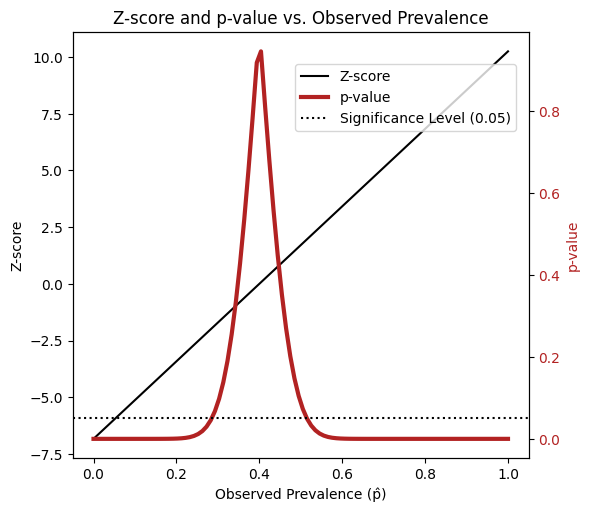

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define range of observed prevalence values (0% to 100%)
p_hat_values = np.linspace(0, 1, 100)

# Compute Z-scores and p-values for each observed prevalence
z_scores = (p_hat_values - p_0) / se_p0
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))

# Plot Z-score and p-value as a function of observed prevalence
fig, ax1 = plt.subplots(figsize=(6, 5))

# Z-score plot
ax1.set_xlabel("Observed Prevalence (p̂)")
ax1.set_ylabel("Z-score", color="black")
ax1.plot(p_hat_values, z_scores, color="black", label="Z-score")
ax1.tick_params(axis="y", labelcolor="black")

# p-value plot (on secondary y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel("p-value", color="firebrick")
ax2.plot(p_hat_values, p_values, color="firebrick", linewidth=3,  label="p-value")
ax2.axhline(y=0.05, color="black", linestyle="dotted", label="Significance Level (0.05)")
ax2.tick_params(axis="y", labelcolor="firebrick")

# Legends
fig.tight_layout()
plt.title("Z-score and p-value vs. Observed Prevalence")
fig.legend(loc="upper right", bbox_to_anchor=(0.88, 0.92))

plt.show()
